# Read CSV data frames and do 2D plots

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits import mplot3d
import cv2

In [2]:
path=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\Test\Test dirOut'

## Create two functions. coolect_as_df will create a list of dataframes. collect_as_array will create a 3D array

In [3]:
def collect_as_df(path):
    
    dfs=[]
    os.chdir(path)
    for f in os.listdir(path):
        df=pd.read_csv(f)
        # try to del unkown 1st column
        try:
            del df['Unnamed: 0']
        except:
            pass
        dfs.append(df)
    print('Completed')
    print('{} Sets of Data Imported'.format(len(dfs)))
    return dfs

In [4]:
def collect_as_array(path):
    os.chdir(path)
    
    #read 1st file and initial array
    f=os.listdir(path)[0]
    df=pd.read_csv(f)
    #delete 1st column, which is unknown
    del df['Unnamed: 0']
    arr=np.array(df)
    
    for f in os.listdir(path)[1:]:
               
        df=pd.read_csv(f)
        try:
            del df['Unnamed: 0']
        except:
            pass
        arr_temp=np.array(df)
        
        #stack the array along depth, which is axis0
        arr=np.dstack((arr,arr_temp))
    print('Import Completed')
    return arr
        
        

## Create a list of dataframes and overview one of them

In [5]:
dfs=collect_as_df(path)
dfs[0].describe()

Completed
1 Sets of Data Imported


,Write_Bias,Read_Bias,A0,f0,Q,Sign_inphase,A0_Sign,Amp_Single_Freq,Phase_Single_Freq
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.000000,0.000000,9.042266,283399.798075,154.399300,-0.145833,-2.722561,0.656148,-8.521056
std,5.789552,4.472653,5.407287,1577.958679,112.763668,0.990341,10.185490,0.388512,91.968032
min,-10.000000,-7.000000,0.204306,258472.237203,75.106274,-1.000000,-18.270083,0.015259,-153.698730
25%,-5.000000,-3.888890,4.172415,283309.194728,134.718765,-1.000000,-11.888443,0.320444,-91.293640
50%,0.000000,0.000000,8.829961,283513.636129,140.461874,-1.000000,-3.126638,0.625629,-74.599915
75%,5.000000,3.888890,14.047080,283779.435808,152.774851,1.000000,4.772258,0.991852,88.455000
max,10.000000,7.000000,18.270083,286257.007986,2408.993564,1.000000,16.245898,1.571703,176.704001


In [6]:
dfs[0].head(5)

,Write_Bias,Read_Bias,A0,f0,Q,Sign_inphase,A0_Sign,Amp_Single_Freq,Phase_Single_Freq,Amp_Array,Freq_Array
0,-10.00000,-7.0,8.574083,280610.326918,114.725433,-1.0,-8.574083,0.961333,-81.463623,[0.44251841 0.45777767 0.32044437 0.03051851 0...,[230000. 230400. 230800. 231200. 231600. 23200...
1,-9.16667,-7.0,7.891465,280972.904845,107.417069,-1.0,-7.891465,0.686667,-92.971802,[0.59511097 0.5493332 0.19837032 0.19837032 0...,[230000. 230400. 230800. 231200. 231600. 23200...
2,-8.33333,-7.0,9.881115,281039.457522,111.858050,-1.0,-9.881115,1.159703,-94.421997,[0.39674065 0.53407395 0.53407395 0.33570362 0...,[230000. 230400. 230800. 231200. 231600. 23200...
3,-7.50000,-7.0,9.284546,281107.904182,114.060368,-1.0,-9.284546,0.885037,-79.804688,[0.62562948 0.65614799 0.1373333 0.01525926 0...,[230000. 230400. 230800. 231200. 231600. 23200...
4,-6.66667,-7.0,8.748871,281158.893331,106.150593,-1.0,-8.748871,0.854518,-99.354858,[0.42725916 0.33570362 0.24414809 0.21362958 0...,[230000. 230400. 230800. 231200. 231600. 23200...


In [7]:
dfs[0]['Q'].dtype

dtype('float64')

In [8]:
wbs=dfs[0]['Write_Bias'].unique()
rbs=dfs[0]['Read_Bias'].unique()
wbs

array([-1.00000e+01, -9.16667e+00, -8.33333e+00, -7.50000e+00,
       -6.66667e+00, -5.83333e+00, -5.00000e+00, -4.16667e+00,
       -3.33333e+00, -2.50000e+00, -1.66667e+00, -8.33333e-01,
        2.22045e-16,  8.33333e-01,  1.66667e+00,  2.50000e+00,
        3.33333e+00,  4.16667e+00,  5.00000e+00,  5.83333e+00,
        6.66667e+00,  7.50000e+00,  8.33333e+00,  9.16667e+00,
        1.00000e+01, -2.22045e-16])

## Create a 3D array, each DataFrame is along axis=2 

In [21]:
arr=collect_as_array(path)
arr.shape

Import Completed


(480, 11)

## Create Folders to Save Ramp Plots

In [10]:
parent_dir=os.path.dirname(os.getcwd())
sub_folder='Ramp Plots'

new_dir=os.path.join(parent_dir,sub_folder)
print(new_dir)

try:
    os.makedirs(new_dir)
except OSError as error: 
    print(error)   

i=0
for f in os.listdir(path):
    i+=1
    new_folder=os.path.join(new_dir,str(i))
    os.makedirs(new_folder)

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\Test\Ramp Plots


## Plots for Each Ramp

### Plot ButterFly Curve. A0 versus Write Voltage at different read bias
### Note A0 changes with Bias

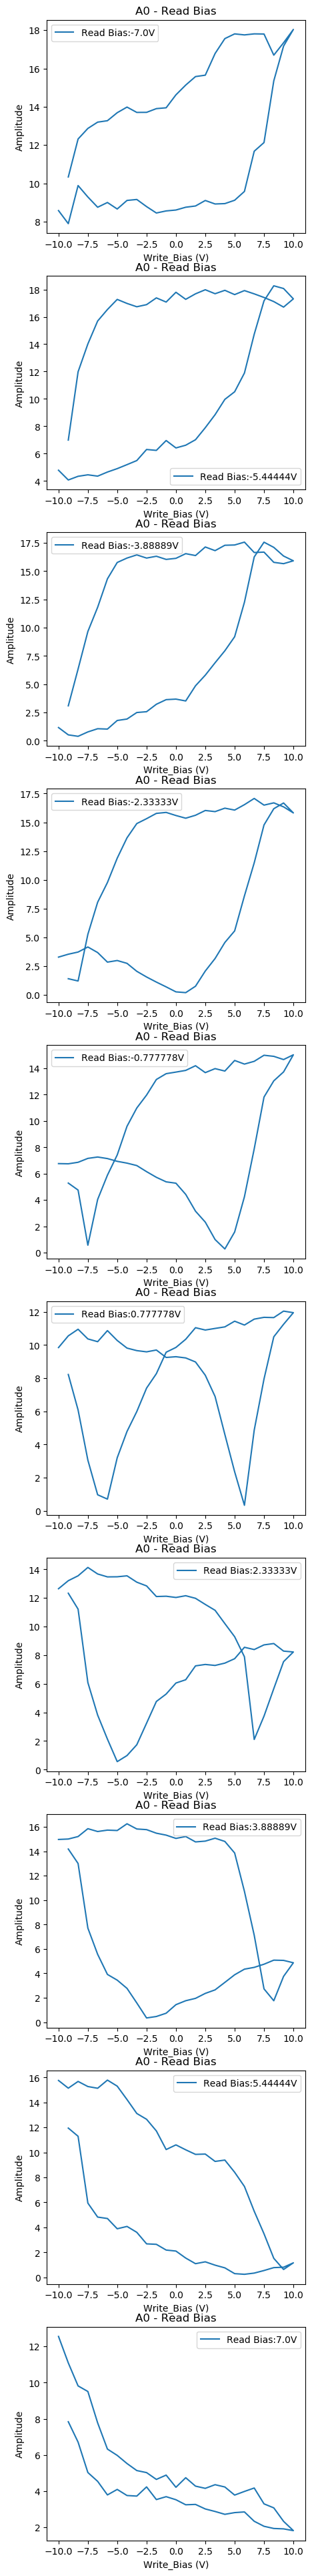

In [10]:
read_bias=np.unique(arr[:,1])
l=len(read_bias)


    
f,ax=plt.subplots(l,figsize=(5,5*l))
f.dpi=100

# user choose the ramp for plot, it can be put into a for loop to output all data
for i,value in enumerate(read_bias):

    slice=arr[:,:]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].plot(temp[:,0],temp[:,2],label='Read Bias:{}V'.format(value))
    ax[i].legend()
    ax[i].set_xlabel('Write_Bias (V)')
    ax[i].set_ylabel('Amplitude')
    ax[i].set_title('A0 - Read Bias')
    
#     plt.savefig('A0 vs Write Bias.png')
    
    
    
    
    

### Plot Single Freq Amplitude Versus Write Bias

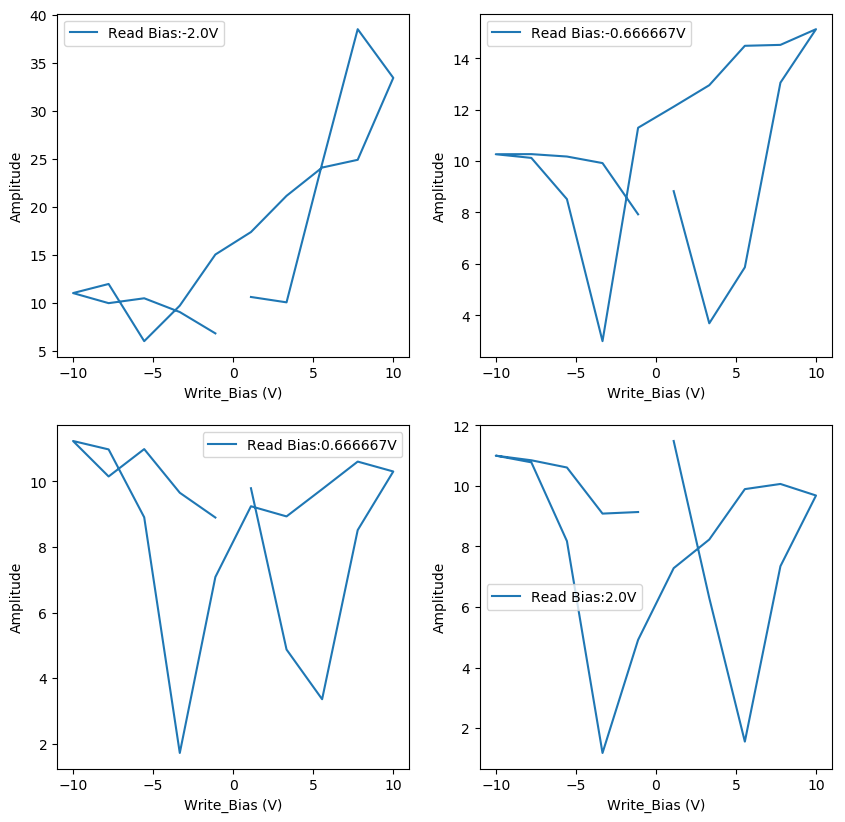

In [20]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)

# f,ax=plt.subplots(1,figsize=(5,5*l))
f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
k=0
for i,value in enumerate(read_bias):

    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].plot(temp[:,0],temp[:,7],label='Read Bias:{}V'.format(value))
    ax[i].legend()
    ax[i].set_xlabel('Write_Bias (V)')
    ax[i].set_ylabel('Amplitude')
#     ax[i].set_title('Single Freq Amp - Read Bias')
    
#     plt.savefig('A0 vs Write Bias.png')
    

### Plot Hysteresis Loop (PR loop), A0*sign(InPhase) versus Write Bias

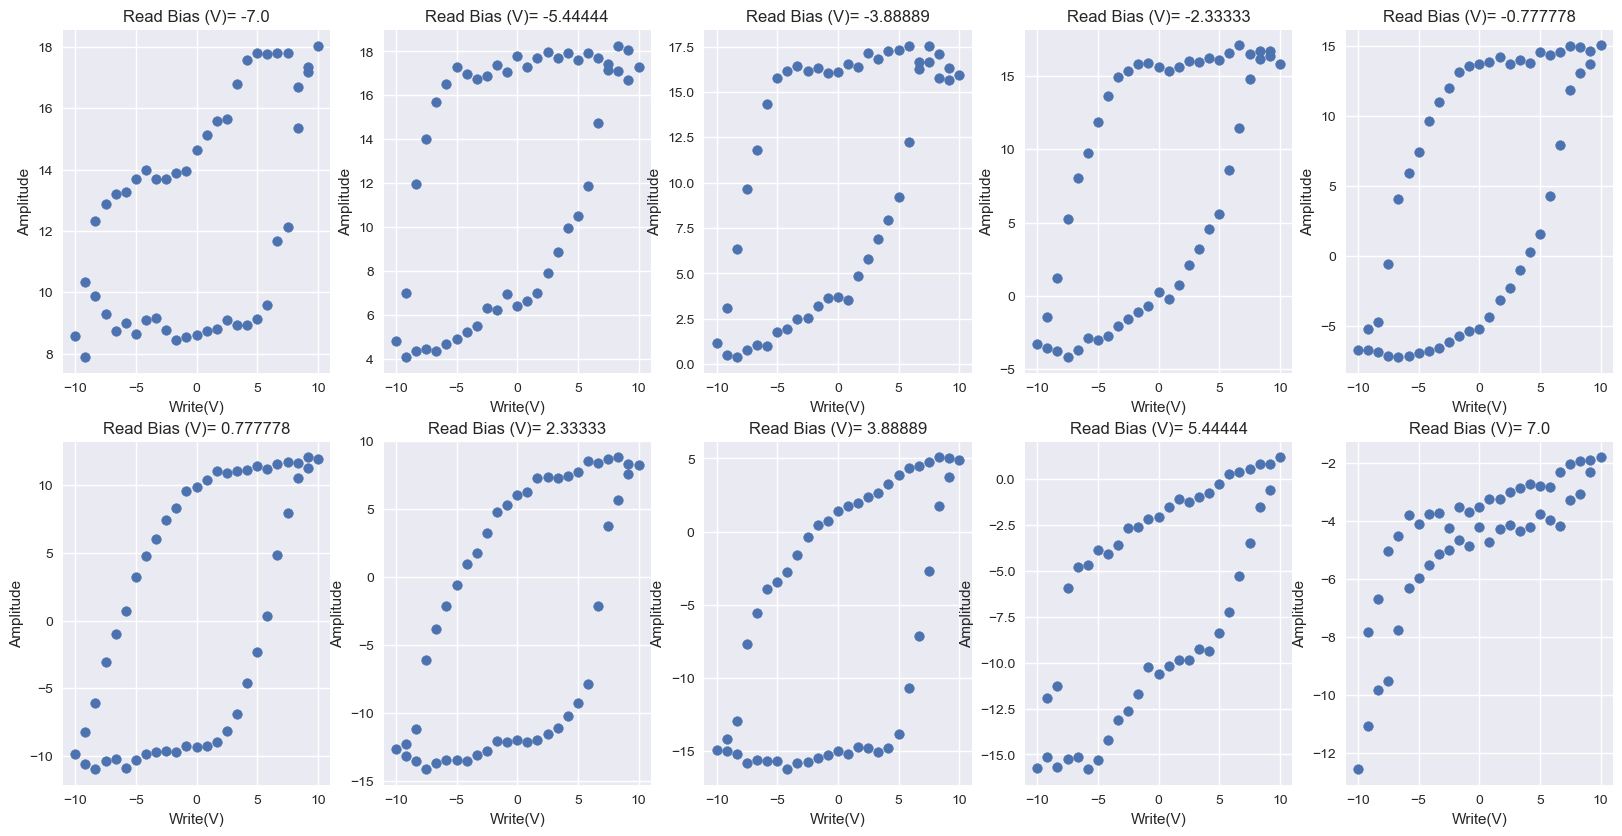

In [31]:

# arr[:,6]=arr[:,6]*(-1)
read_bias=np.unique(arr[:,1])
l=len(read_bias)

plt.style.use('seaborn')
f,ax=plt.subplots(2,5,figsize=(20,10))
# f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
for i,value in enumerate(read_bias):
    slice=arr[:,:]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].scatter(temp[:,0],temp[:,6])
#     ax[i].legend(loc='upper left')
    ax[i].set_xlabel('Write(V)')
    ax[i].set_ylabel('Amplitude')
    ax[i].set_title('Read Bias (V)= {}'.format(value))
    
    plt.savefig('A0 vs Write Bias.png')

### Plot f0, A0 versus Write Bias

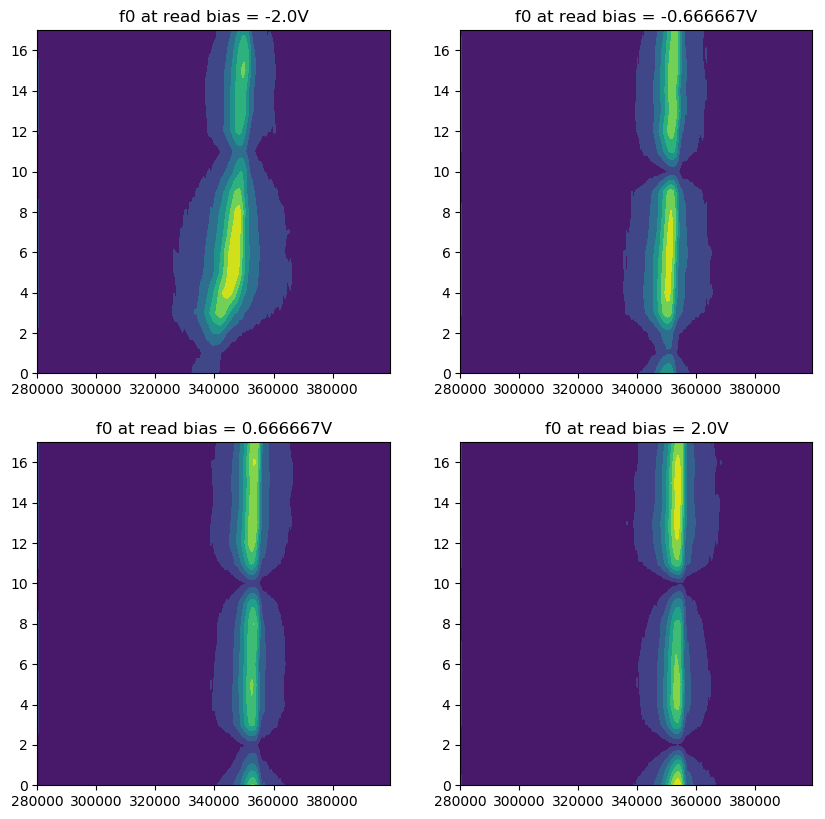

In [18]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)

'''Each Amp_Arr and Freq_Arr is string type, need to conver them into float list firstly'''

# Convert freq arr string into freq arr float
freq=arr[0,-1,0]
freq=freq.replace('[','')
freq=freq.replace(']','')
freq=[float(freq) for freq in freq.split()]

# f,ax=plt.subplots(1,1,figsize=(5,5*l))
f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
k=0

for i,value in enumerate(read_bias):
  
    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    
    amp_arr=[]
    
    for m in range(temp.shape[0]):
        y=temp[m,-2]
        y=y.replace('[','')
        y=y.replace(']','')
        y=[float(y) for y in y.split()]
        for n in y:
            amp_arr.append(n)
    
    # Frequency is the same for each write bias
    # y is the indexes of write biases
    # temp.shape[0] is the length of write bias list  
    x=freq
    y=np.arange(temp.shape[0])

    X,Y=np.meshgrid(x,y)
    Z=np.array(amp_arr).reshape(temp.shape[0],len(freq))

    ax[i].contourf(X,Y,Z)
    ax[i].set_title('f0 at read bias = {}V'.format(value))
    
#     plt.savefig('A0 vs Write Bias.png')

In [33]:
a=[1,2,3]
a.append([4,5,6])
a

[1, 2, 3, [4, 5, 6]]

In [19]:
x=arr[0,-1,0]
x=x.replace('[','')
x=x.replace(']','')
x=[float(x) for x in x.split()]
x

[280000.0,
 280600.0,
 281200.0,
 281800.0,
 282400.0,
 283000.0,
 283600.0,
 284200.0,
 284800.0,
 285400.0,
 286000.0,
 286600.0,
 287200.0,
 287800.0,
 288400.0,
 289000.0,
 289600.0,
 290200.0,
 290800.0,
 291400.0,
 292000.0,
 292600.0,
 293200.0,
 293800.0,
 294400.0,
 295000.0,
 295600.0,
 296200.0,
 296800.0,
 297400.0,
 298000.0,
 298600.0,
 299200.0,
 299800.0,
 300400.0,
 301000.0,
 301600.0,
 302200.0,
 302800.0,
 303400.0,
 304000.0,
 304600.0,
 305200.0,
 305800.0,
 306400.0,
 307000.0,
 307600.0,
 308200.0,
 308800.0,
 309400.0,
 310000.0,
 310600.0,
 311200.0,
 311800.0,
 312400.0,
 313000.0,
 313600.0,
 314200.0,
 314800.0,
 315400.0,
 316000.0,
 316600.0,
 317200.0,
 317800.0,
 318400.0,
 319000.0,
 319600.0,
 320200.0,
 320800.0,
 321400.0,
 322000.0,
 322600.0,
 323200.0,
 323800.0,
 324400.0,
 325000.0,
 325600.0,
 326200.0,
 326800.0,
 327400.0,
 328000.0,
 328600.0,
 329200.0,
 329800.0,
 330400.0,
 331000.0,
 331600.0,
 332200.0,
 332800.0,
 333400.0,
 334000.0,

# Plot 2D Maps of Interests

In [55]:
# Identify the unique read bias
np.unique(arr[:,1,0])

array([-2.0, -0.666667, 0.666667, 2.0], dtype=object)

## Mask the array and plot 2D images for each read bias

[[336754.87531346 338710.14396103 343711.11268234 348072.15779174
  348096.23358624 348846.69639668 347359.69470124 349293.07743758
  349894.55726653 349262.55478034 350106.36113964 350207.23697055
  346198.61279258 344333.40870923 346621.41706197 350229.63437541
  350440.50973538 349953.40448405 348319.19104527 347857.24236896
  346226.97361148 348410.16010556 348666.94785972 349123.46680606
  349506.79383383 341003.53118375 345936.33630217 348154.24466489
  350823.75004232 345216.31104218]
 [344903.28600264 349853.10302438 342333.04897488 348888.16782868
  348167.85658301 347554.43849647 351062.88444103 347676.42466398
  350505.98326878 349594.76952517 348768.9684503  347034.13543796
  350122.68219653 351493.78607907 350632.2795279  349974.01732045
  351138.66819555 351188.47867657 345430.92031291 352194.47423509
  351374.72232642 350736.11973638 351358.12260306 349614.40180914
  350766.81020759 350119.90215569 350586.33308362 351228.13190315
  351291.95090957 349642.05046181]
 [3514

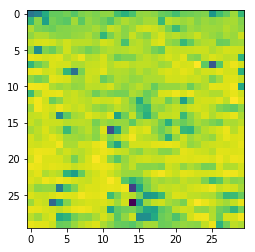

In [90]:
'''It looks like the elements in this array is changed to string somehow!!
    need to convert it into float before using
'''
test_arr=arr[0,3,0:900]
test_arr=np.array([float(x) for x in test_arr]).reshape(30,30)
# test_arr=np.array(test_arr).reshape(30,30)
print(test_arr)
plt.imshow(test_arr)

## Plot Resonance Frequency 2D Map

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\f0'


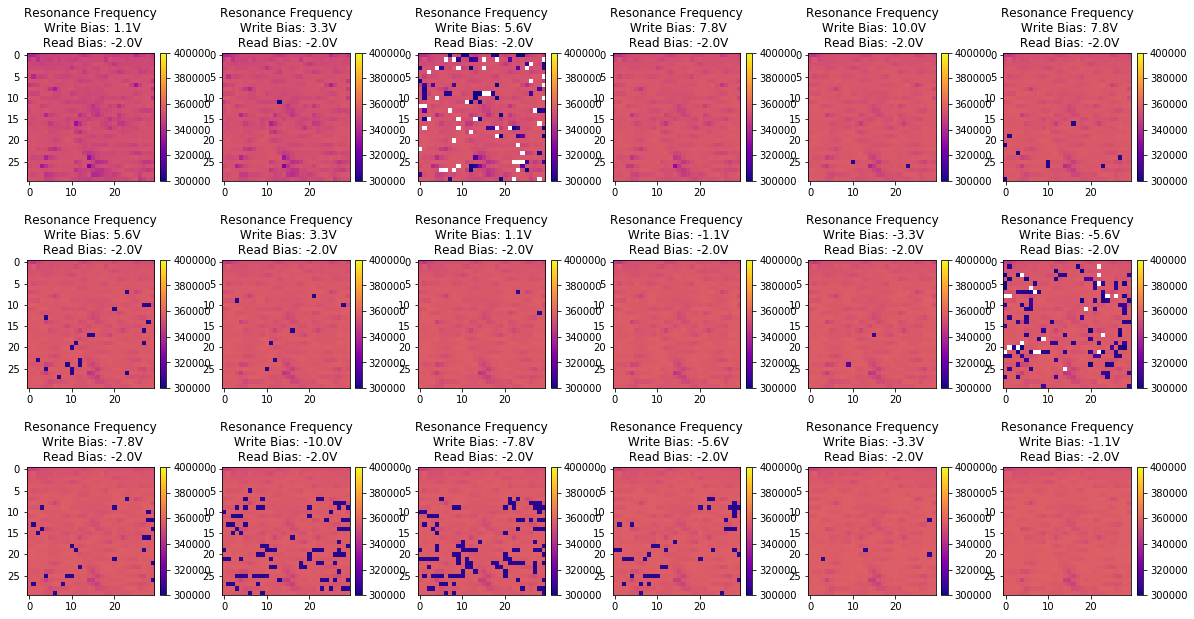

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\f0'


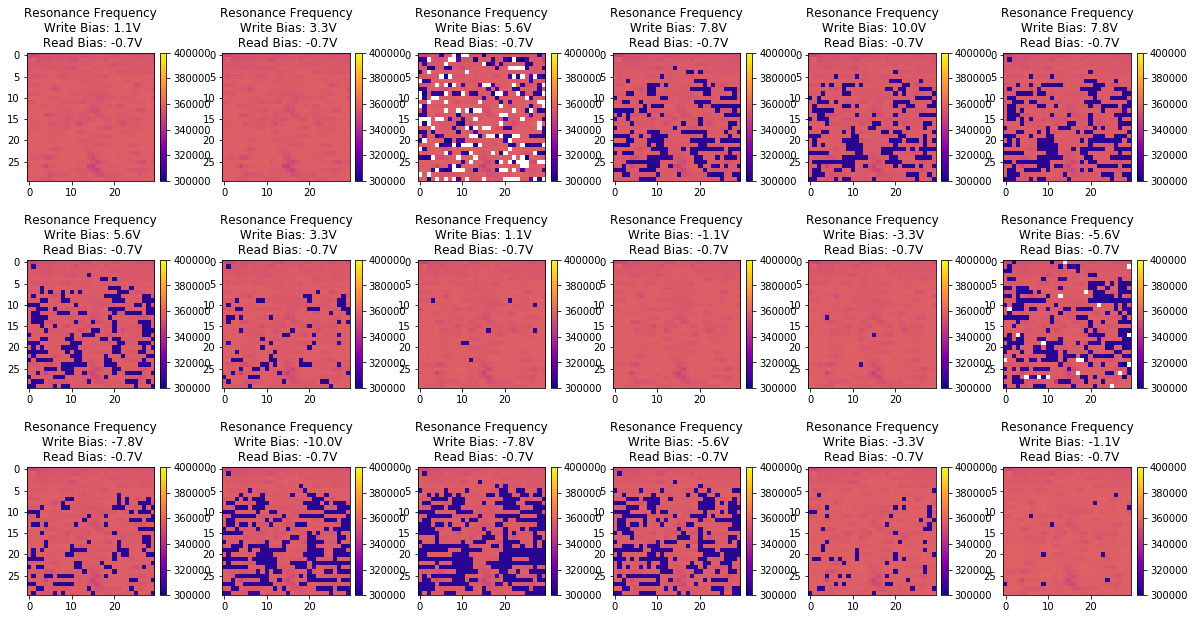

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\f0'


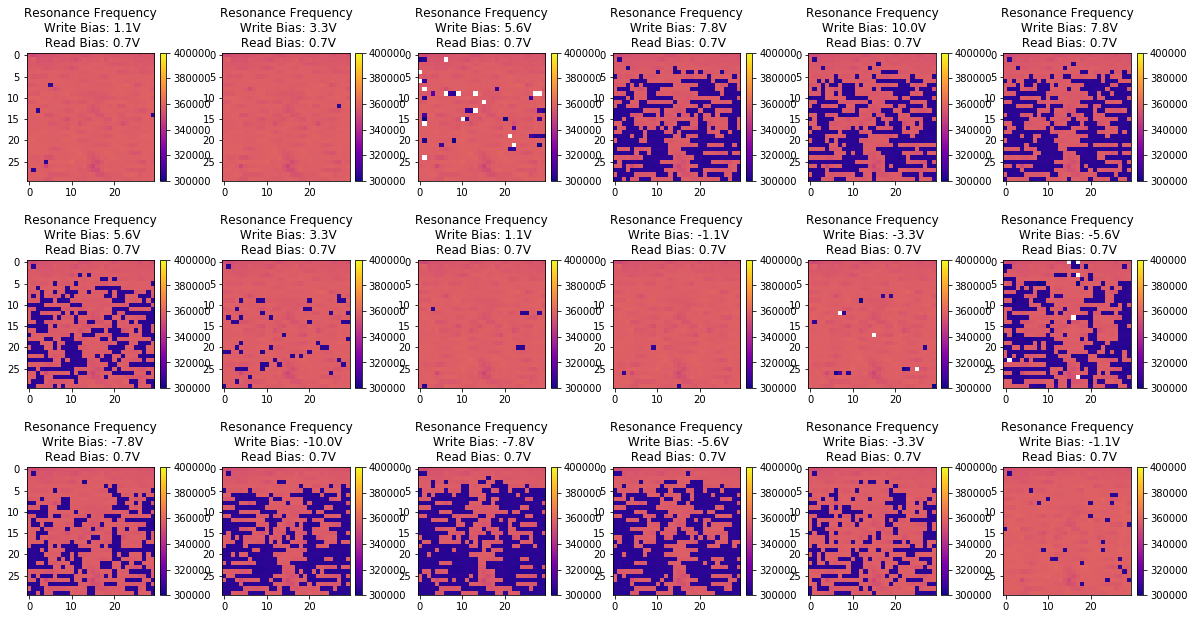

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\f0'


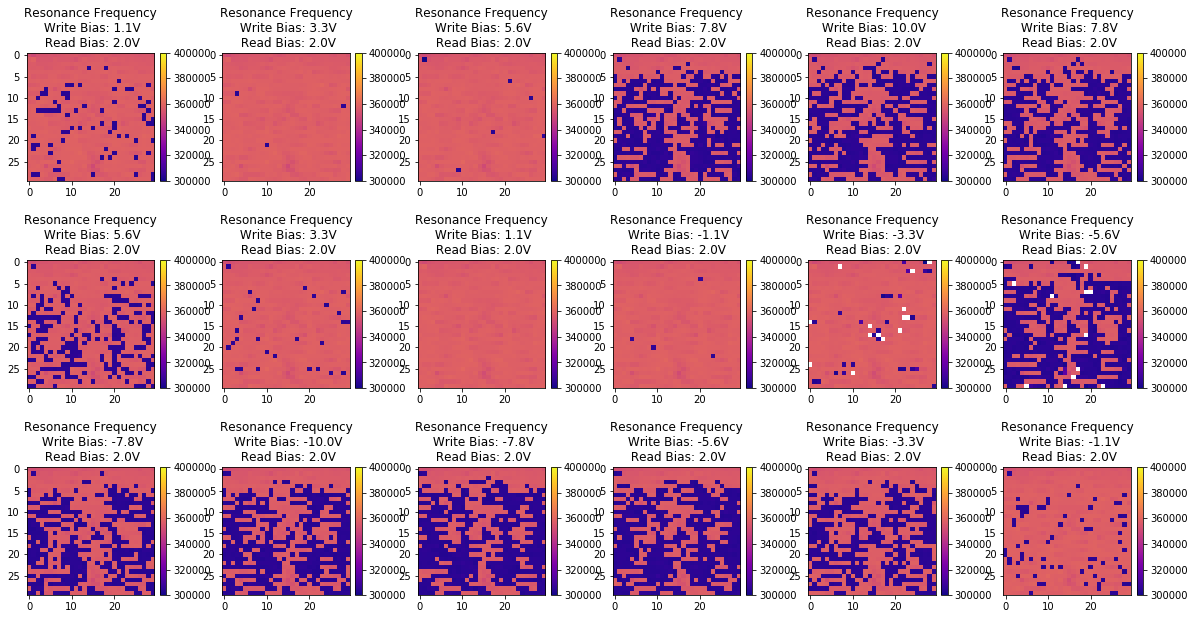

In [14]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.6, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)
        
        # User chose which data type to be plotted
        im=axs[i].imshow(f0,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Resonance Frequency\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)
        im.set_clim(300000,400000)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='f0'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('f0 Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




## Plot Single Frequency Amplitude

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Amp'


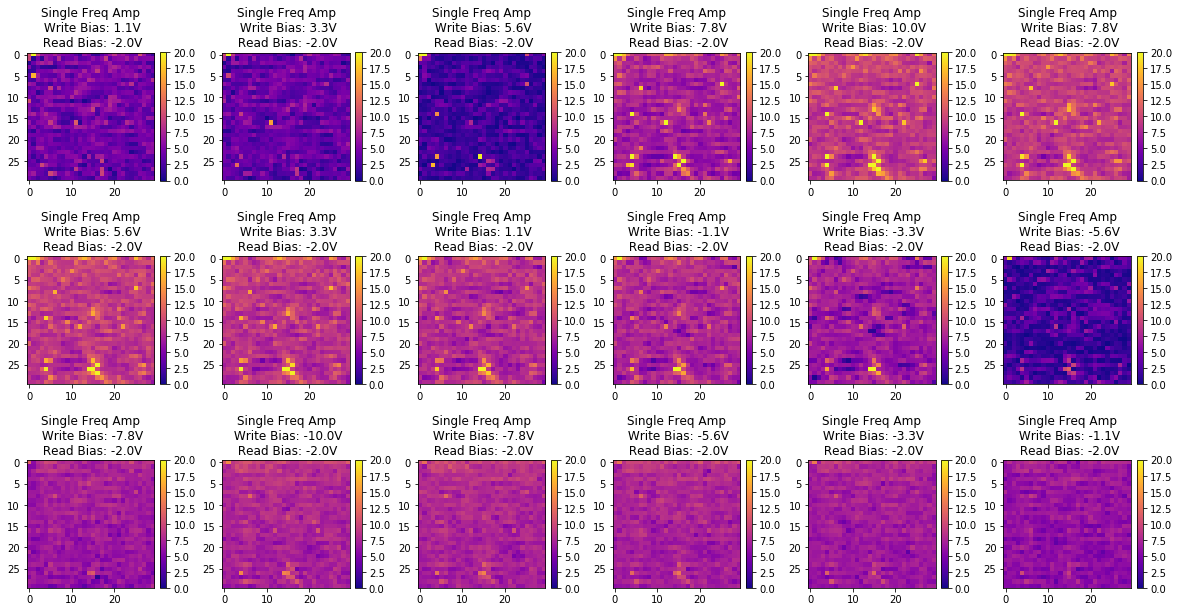

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Amp'


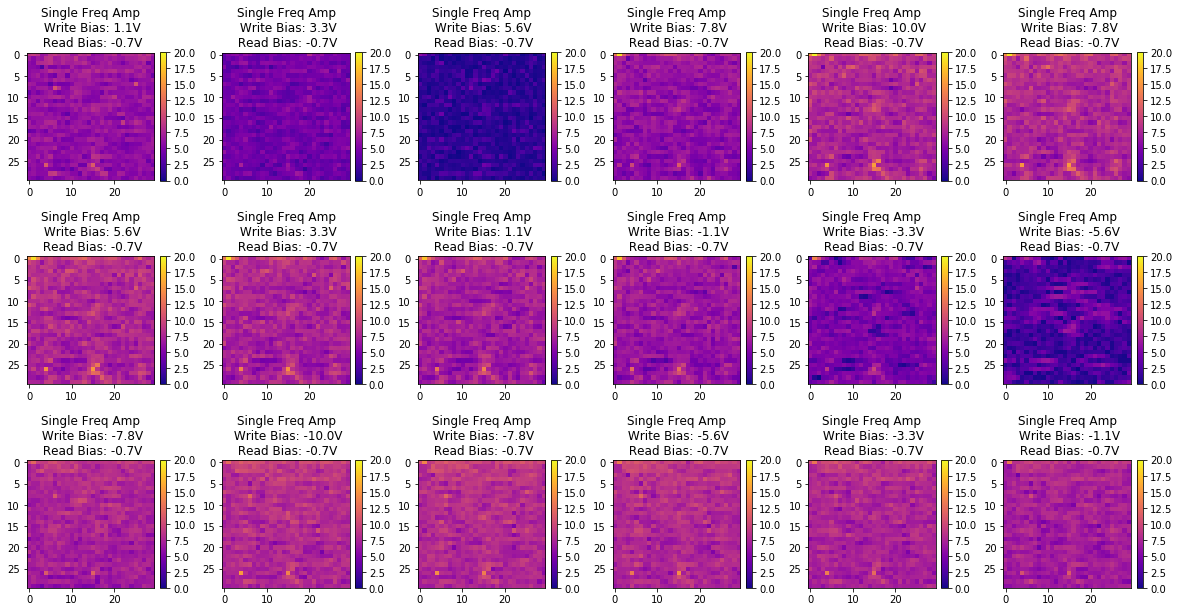

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Amp'


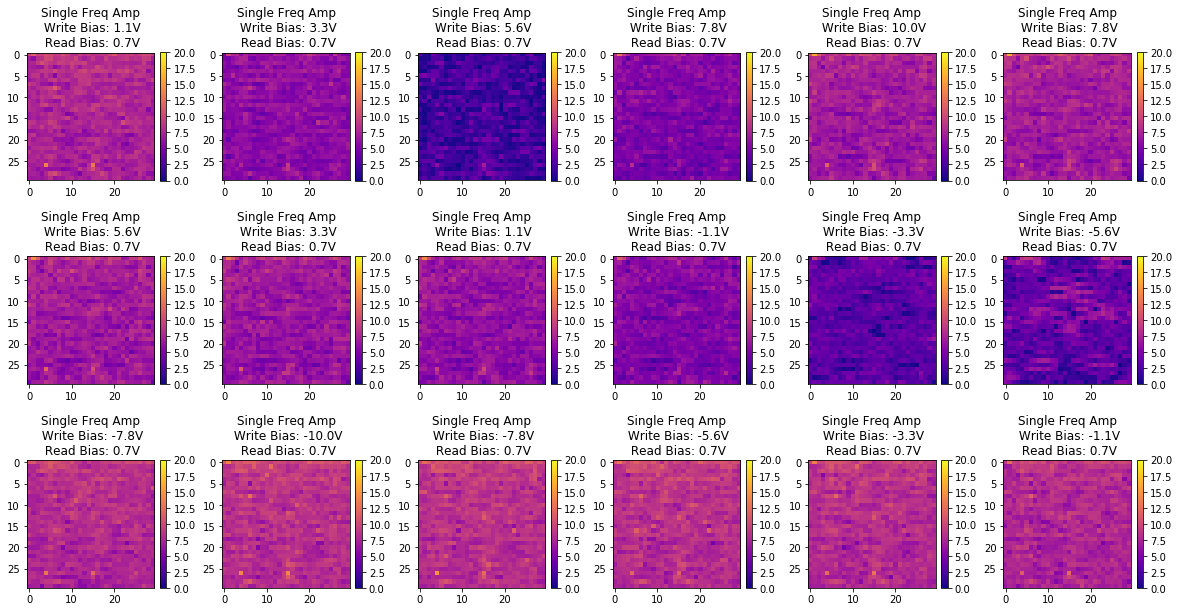

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Amp'


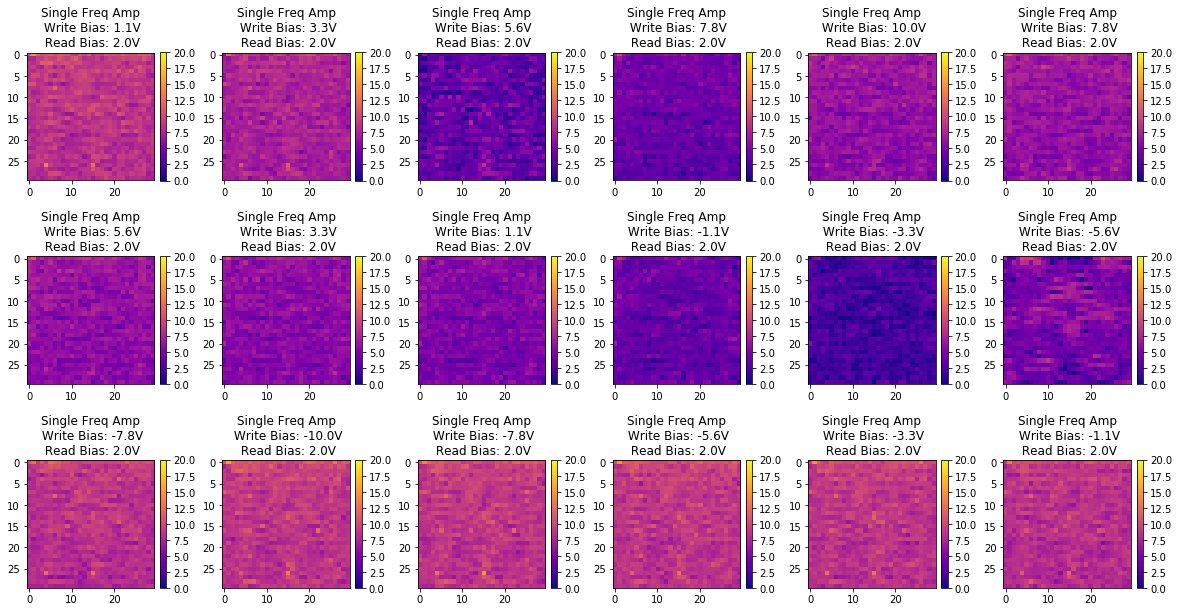

In [112]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.5, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        im=axs[i].imshow(asf,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Single Freq Amp\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(0,20)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='Single Freq Amp'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('Single Freq Amp Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




## Plot Single Freq Phase

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Phase'


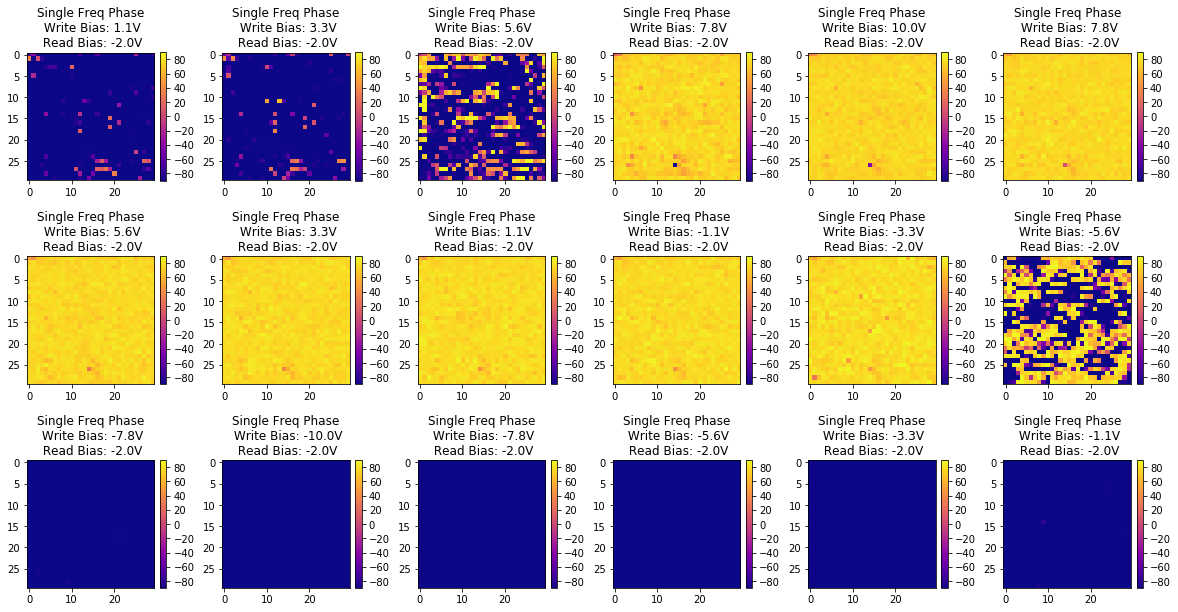

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Phase'


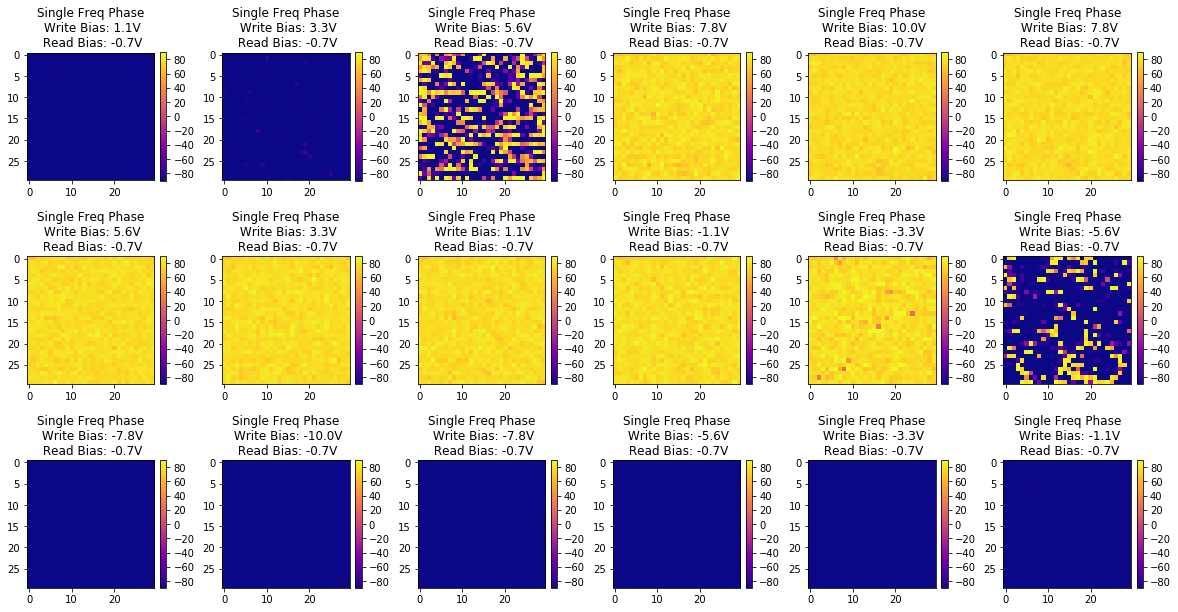

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Phase'


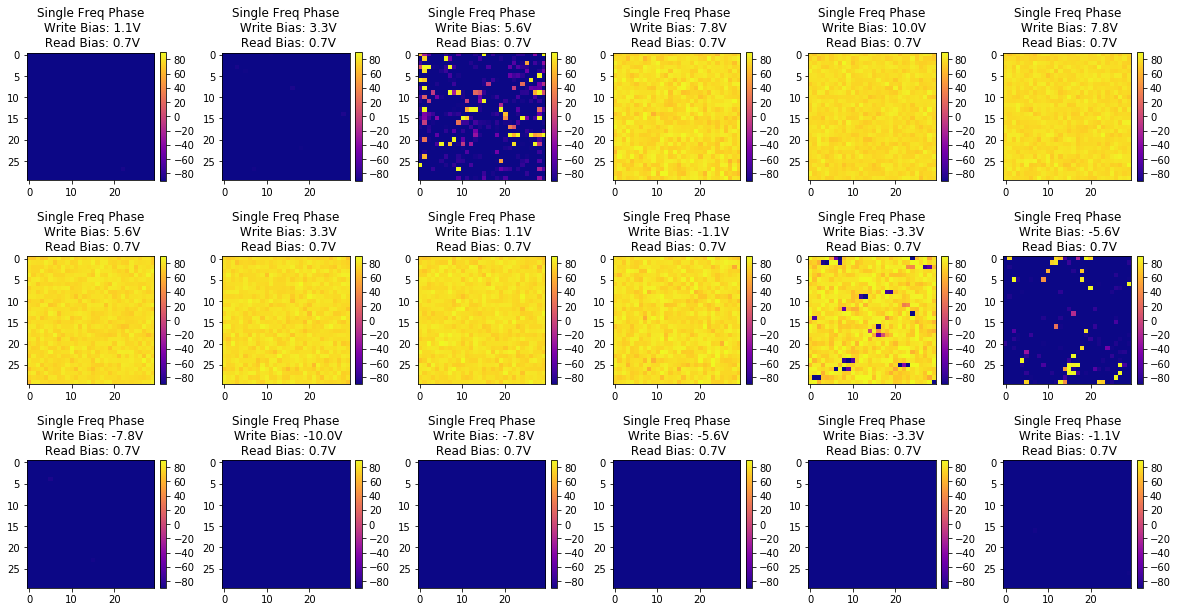

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame
[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Xiaomin.Chen\\Desktop\\AFMi-Test\\Projects\\SS-PFM\\2D Map on PZT\\Data2\\DataFrame\\Single Freq Phase'


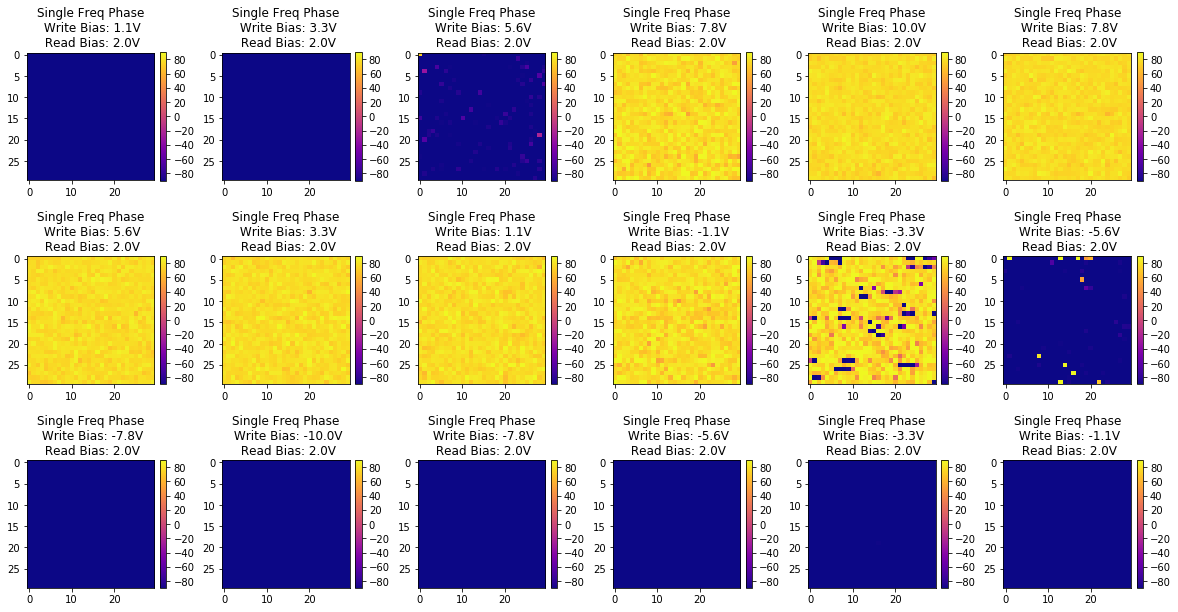

In [113]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.5, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        im=axs[i].imshow(psf,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Single Freq Phase\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(-90,90)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='Single Freq Phase'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('Single Freq Phase Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




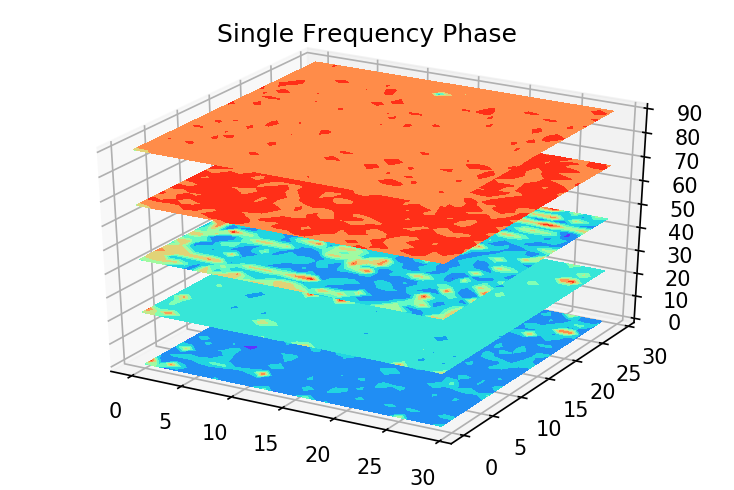

In [116]:
%matplotlib inline
# %matplotlib notebook

rb=arr[0,-1,0]

fig=plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

x = np.arange(0, 30)
X,Y=np.meshgrid(x,x)

# Get Single Frequency Phase 

Z1=np.array([float(x) for x in arr[0,8,:900]]).reshape(30,30)
Z2=np.array([float(x) for x in arr[1,8,:900]]).reshape(30,30)
Z3=np.array([float(x) for x in arr[2,8,:900]]).reshape(30,30)
Z4=np.array([float(x) for x in arr[3,8,:900]]).reshape(30,30)
Z5=np.array([float(x) for x in arr[4,8,:900]]).reshape(30,30)

# ax.plot_surface(X,Y,Z1)
ax.contourf(X, Y, Z1, zdir='z',offset=0,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z2, zdir='z',offset=22.5,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z3, zdir='z',offset=45,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z4, zdir='z',offset=67.5,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z5, zdir='z',offset=90,cmap=plt.get_cmap('rainbow'))

ax.set_zlim(0,90)
plt.title('Single Frequency Phase')
# plt.savefig('Single Freq Phase Slice Map Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
plt.show()

## Create A Video out of pictures
## Output the pictures needed first

C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame


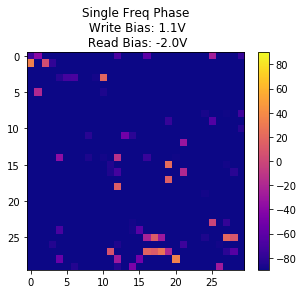

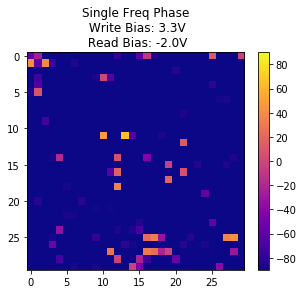

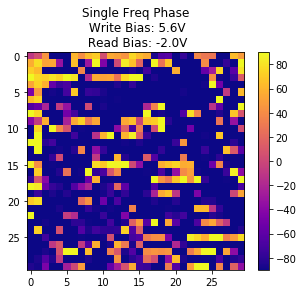

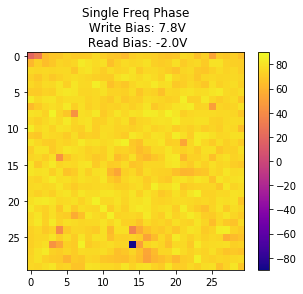

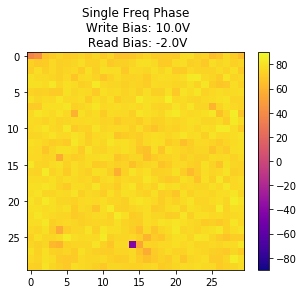

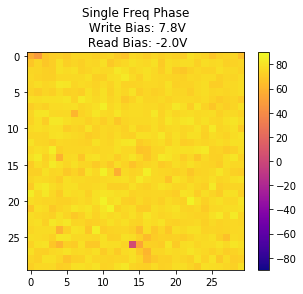

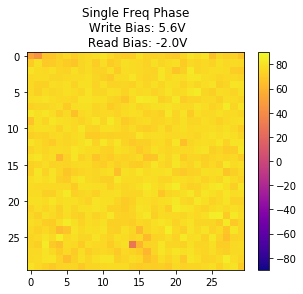

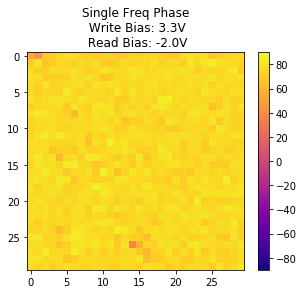

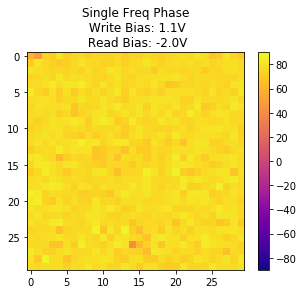

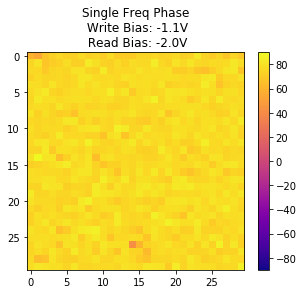

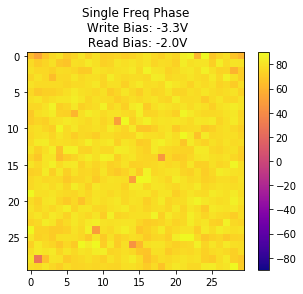

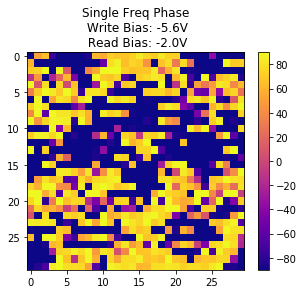

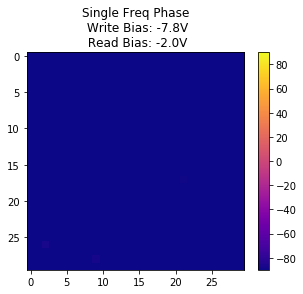

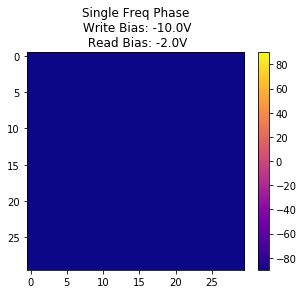

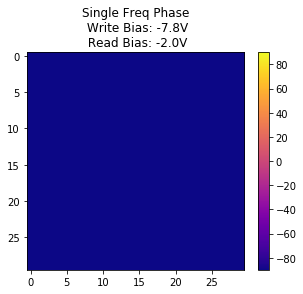

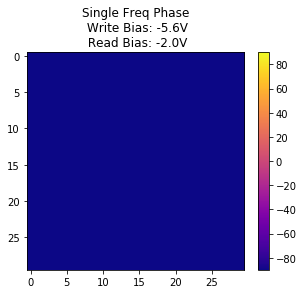

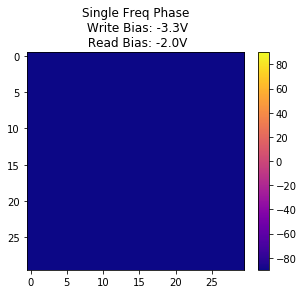

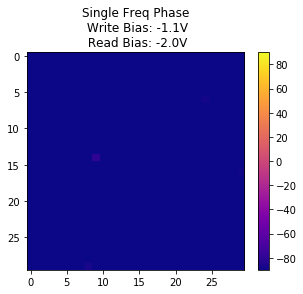

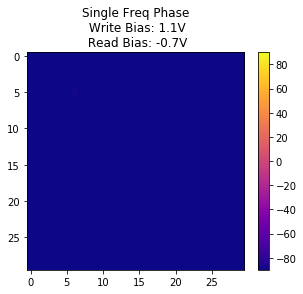

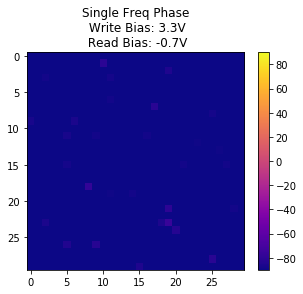

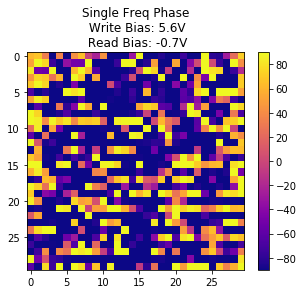

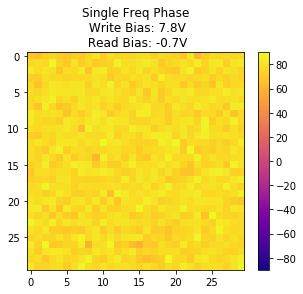

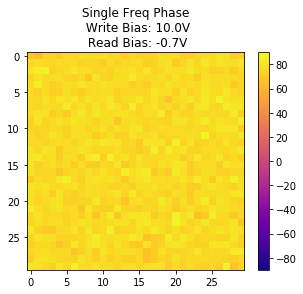

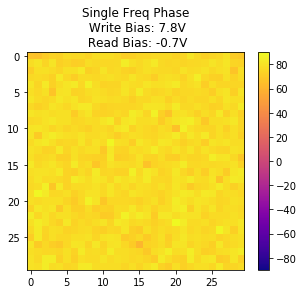

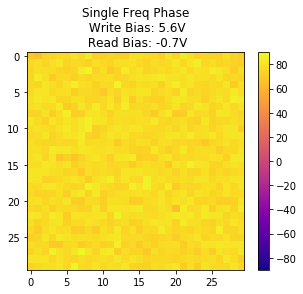

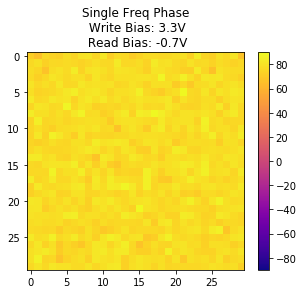

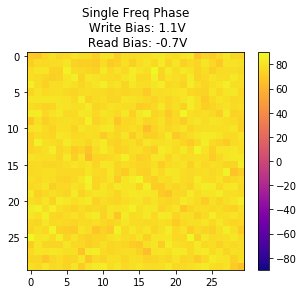

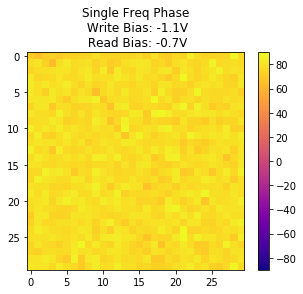

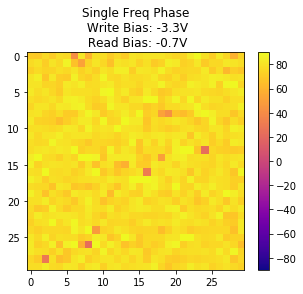

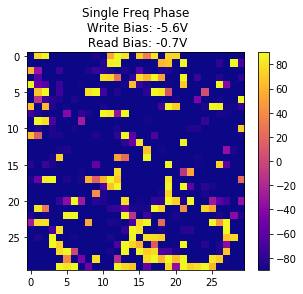

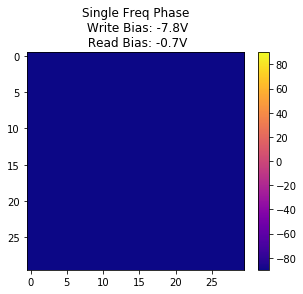

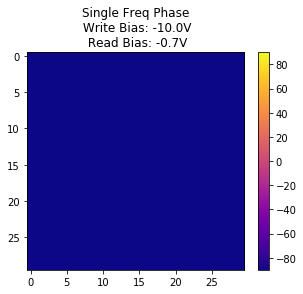

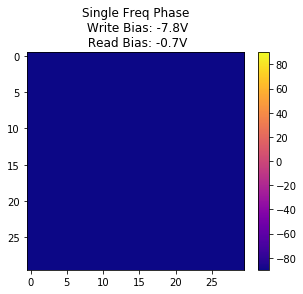

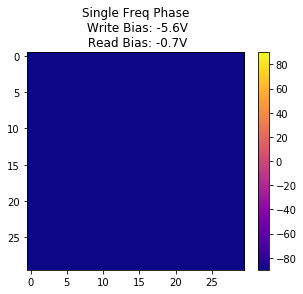

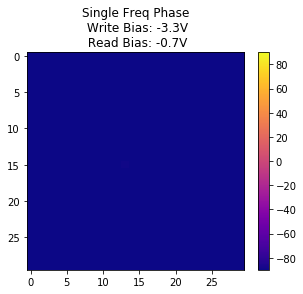

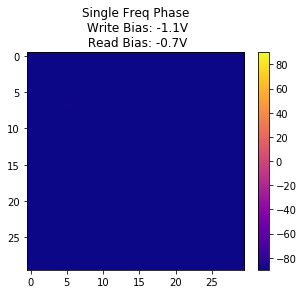

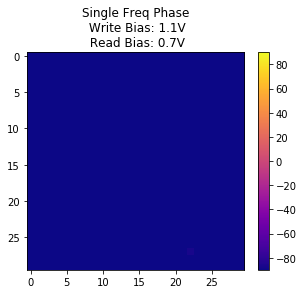

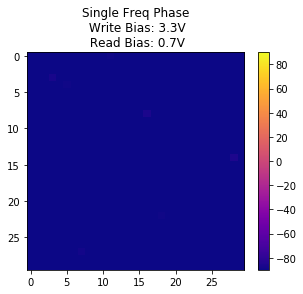

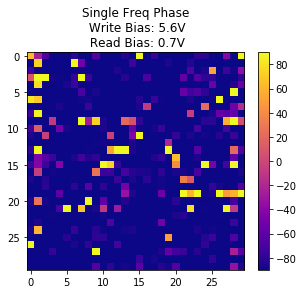

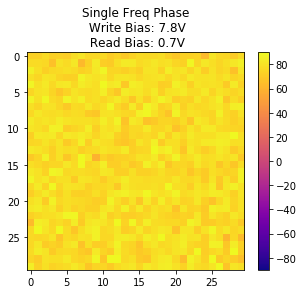

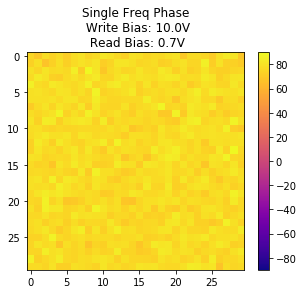

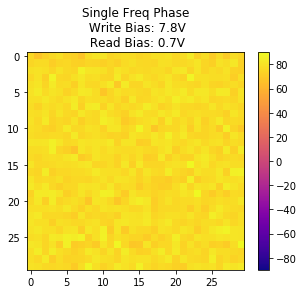

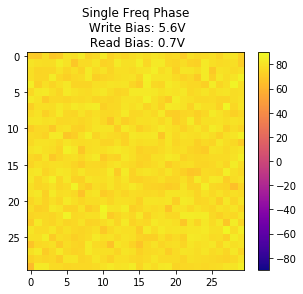

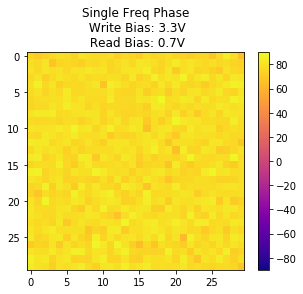

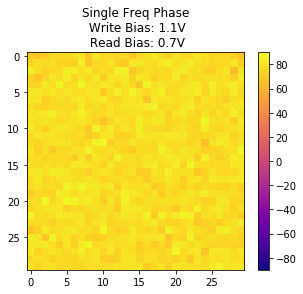

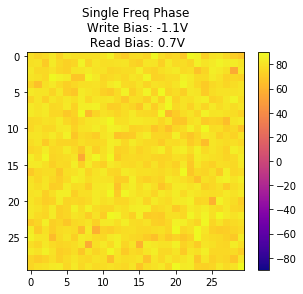

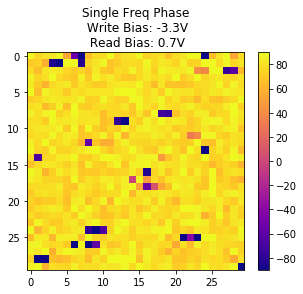

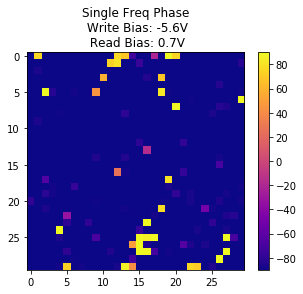

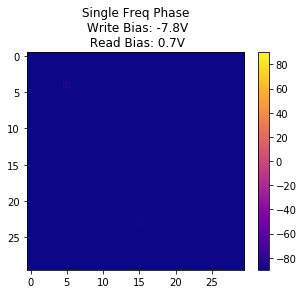

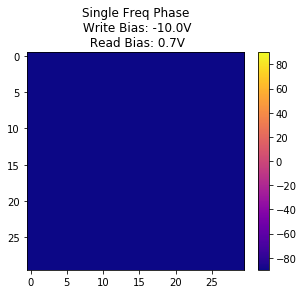

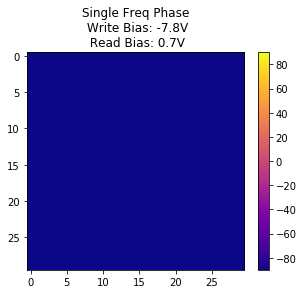

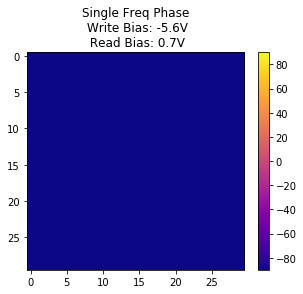

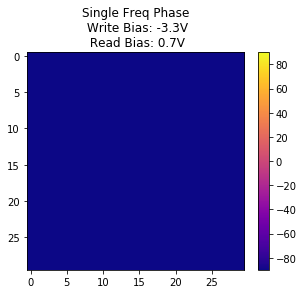

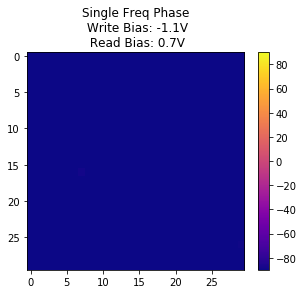

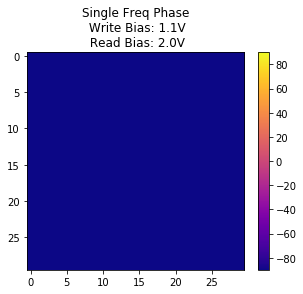

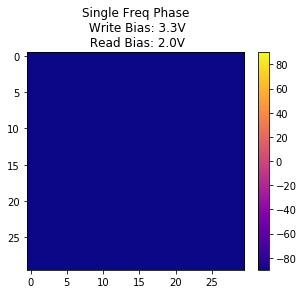

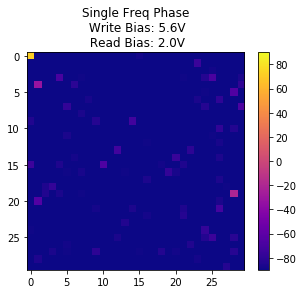

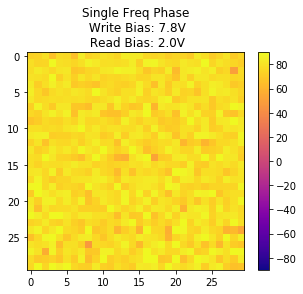

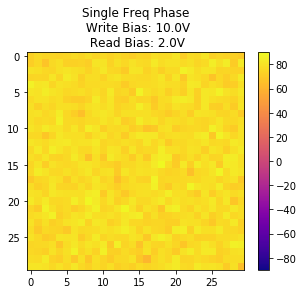

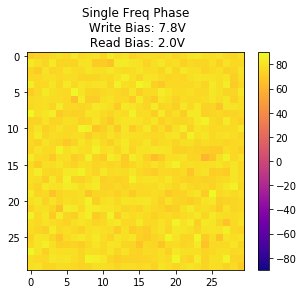

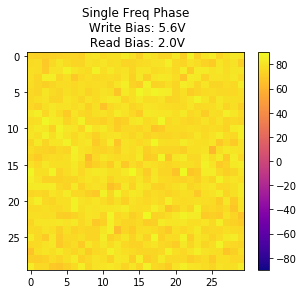

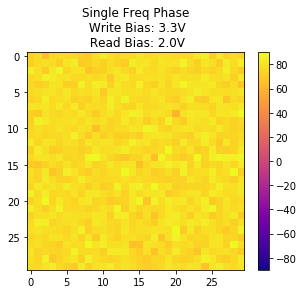

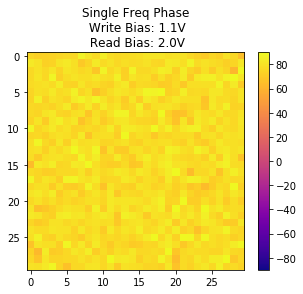

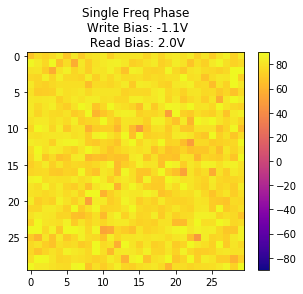

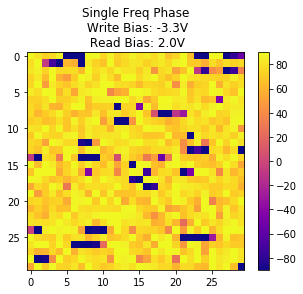

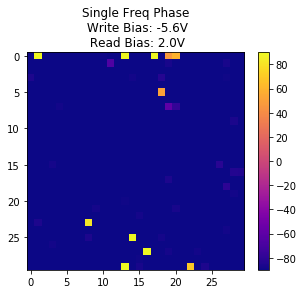

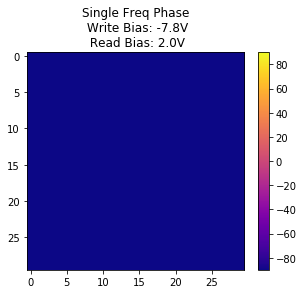

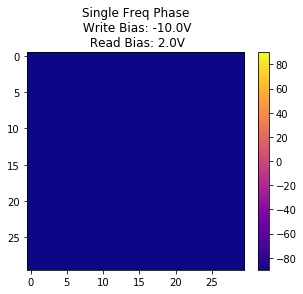

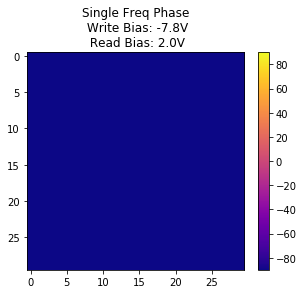

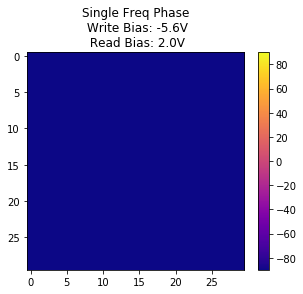

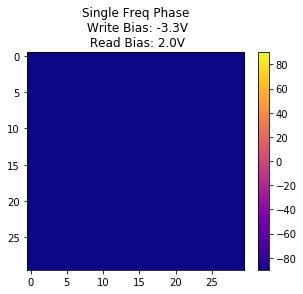

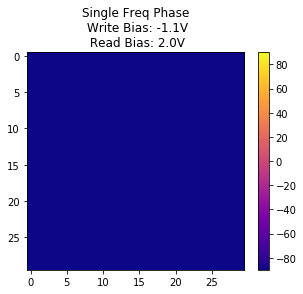

In [117]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

# Go to the upper level and create a folder
parent_dir=os.path.dirname(os.getcwd())
print(parent_dir)
folder='Single Freq Phase Video'
new_path=os.path.join(parent_dir,folder)
try:
    os.mkdir(new_path)
except OSError as error: 
    print(error)  
# save the image in that folder
os.chdir(new_path)


rbs=np.unique(arr[:,1,0])

k=0

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]
        k+=1
        s=str(k).zfill(2)
        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        
        fig=plt.figure()
        im=plt.imshow(psf,cmap=plt.get_cmap('plasma'))
        plt.title('Single Freq Phase\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        plt.colorbar(im,fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(-90,90)


        plt.savefig('{} Write Bias {:.1f} Read Bias {:.1f}.tiff'.format(s,wb,rb),bbox_inches='tight',dpi=200)
        plt.show()

## Create a move out of pictures

In [118]:
def convert_pic_to_video(pathIn,pathOut,fps,time):
    
    os.chdir(pathIn)
    files=[f for f in os.listdir(pathIn)]    
    frame_array=[]
    
    for f in files:
        img=cv2.imread(f)
        height,width,layers=img.shape
        size=(width,height)
#         print(f)
        for k in range(time):
            frame_array.append(img)
        
    out=cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'mp4v'),fps,size)
    
    for i in range(len(frame_array)):
        out.write(frame_array[i])
        
    out.release()

In [119]:
pathIn=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame\Single Freq Phase Video'
pathOut=os.path.join(pathIn,'video.avi')
fps=1
time=1
convert_pic_to_video(pathIn,pathOut,fps,time)

In [ ]:
# View more python tutorials on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

# 14 - 3d
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
Tutorial reference:
http://www.python-course.eu/matplotlib_multiple_figures.php
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
"""
============= ================================================
        Argument      Description
        ============= ================================================
        *X*, *Y*, *Z* Data values as 2D arrays
        *rstride*     Array row stride (step size), defaults to 10
        *cstride*     Array column stride (step size), defaults to 10
        *color*       Color of the surface patches
        *cmap*        A colormap for the surface patches.
        *facecolors*  Face colors for the individual patches
        *norm*        An instance of Normalize to map values to colors
        *vmin*        Minimum value to map
        *vmax*        Maximum value to map
        *shade*       Whether to shade the facecolors
        ============= ================================================
"""

# I think this is different from plt12_contours
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
"""
==========  ================================================
        Argument    Description
        ==========  ================================================
        *X*, *Y*,   Data values as numpy.arrays
        *Z*
        *zdir*      The direction to use: x, y or z (default)
        *offset*    If specified plot a projection of the filled contour
                    on this position in plane normal to zdir
        ==========  ================================================
"""

ax.set_zlim(-2, 2)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.sin(X)*np.sin(Y)

levels = np.linspace(-1, 1, 40)

ax.contourf(X, Y, .1*np.sin(3*X)*np.sin(5*Y), zdir='z', levels=.1*levels)
ax.contourf(X, Y, 3+.1*np.sin(5*X)*np.sin(8*Y), zdir='z', levels=3+.1*levels)
ax.contourf(X, Y, 7+.1*np.sin(7*X)*np.sin(3*Y), zdir='z', levels=7+.1*levels)

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 10)

plt.show()

In [108]:
arr[0,:,0]

array([1.11111, -2.0, 13.862315804726059, 336754.8753134581,
       51.58614938424697, 1.0, 13.862315804726059, 10.58416748046875,
       -74.39643144607544,
       '[ 4.9746933   1.26379395  1.03655243  0.6348877   0.86004639  0.71729279\n  1.60494995  2.46446228  0.6738205   1.33722687  1.0538559   0.63130951\n  1.07212067  0.71937561  1.28504944  0.96995544  1.33460999  0.29138184\n  0.67414093  1.01764679  1.44382477  0.96755219  1.14624786  1.2068634\n  1.55693817  1.46903229  1.37599945  1.78855896  1.5220108   1.63330841\n  1.20755768  1.10934448  1.71213531  1.78503418  1.16371155  1.47576141\n  1.42198181  1.12798309  1.69397736  1.90786743  2.36192322  1.24008179\n  1.44905853  1.59400177  2.27727509  1.65109253  1.56724548  1.57723236\n  2.12245178  1.91283417  2.14984894  0.99649811  2.02936554  1.81638336\n  2.09398651  1.96260834  2.44091034  2.61309052  2.12896729  2.29564667\n  2.71749878  3.62042999  2.59781647  2.48272705  2.73458862  3.17486572\n  3.0689621   3.02030